**Investigating age as a factor for heart disease**

*Heart disease is the number one leading cause of death in the united states*

In this study I aim to investigate what patterns can be found in patients diagnosed with heart disease. I want to use those patterns to answer the underlying question of what factors could possilbly contribute to heart disease. Identifying these patterns and factors could ultimately help to prevent heart disease in the future.   

**Step 1: Unpackaging the data**

We begin by first uploading the csv file of patient data

In [24]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as md
from scipy.interpolate import *
from sklearn.linear_model import LinearRegression
from sklearn import *
from sklearn.metrics import mean_squared_error
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['heart.csv']


**Step 2: Physical features**

I want to conduct a "top down" experiment for this study. Most of the data consists of features about a person they wouldn't know off the top of their head such as their cholesterol level or their fasting blood sugar level. By first investigating the more obvious features they can easily identify, specifically age and sex, it would be easier for a patient to know when to see a doctor to check for heart conditions. 

The next step would be to plot a first few entries for the age column to identify any patterns 

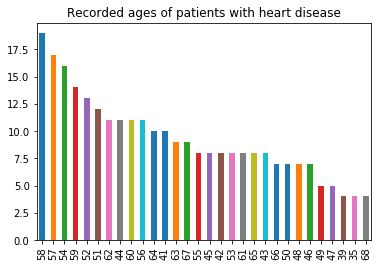

In [25]:
data = pd.read_csv("../input/heart.csv")
data['age'].value_counts().head(30).plot.bar(title = "Recorded ages of patients with heart disease")





One would expect that the older a person is, the more succeptible they are to heart disease. Suprisingly, the bar graph tells a different story. One of the oldest ages recorded, 68, is the least populated entry while 58 was the most populated.

In [26]:
data.age.describe()

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

The previous code shows that the average age for heart disease begins at 54, far younger than the maximum age recorded which was 77. Next, I will analyze the different patterns in gender.

**A gender based analysis**

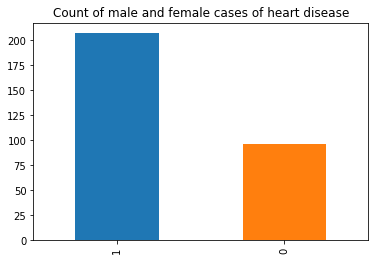

In [27]:
data['sex'].value_counts().head(30).plot.bar(title = "Count of male and female cases of heart disease")

In this context, 1 represents male and 0 female. Based on the data, males are much more succeptible to heart disease than females. To further investigate this, I wanted to analyze the ages specifically by gender. First, I will filter out the male data and plot their ages. 

count    207.000000
mean      53.758454
std        8.883803
min       29.000000
25%       47.000000
50%       54.000000
75%       59.500000
max       77.000000
Name: age, dtype: float64

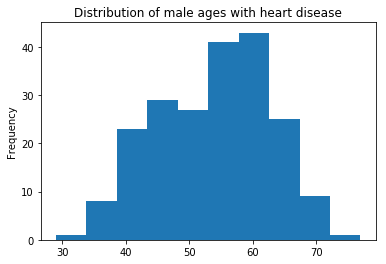

In [28]:
is_male = data['sex'] == 1
all_males = data[is_male]
all_males['age'].plot.hist(title = "Distribution of male ages with heart disease")
all_males['age'].describe()

From the graph and the analysis of the data we see that the average age for heart disease in males is rougly 54 years old, the same average from our total data set. However, most of these cases occur and around age 60. Next, we will compare these results to the female data. 

count    96.000000
mean     55.677083
std       9.409396
min      34.000000
25%      49.750000
50%      57.000000
75%      63.000000
max      76.000000
Name: age, dtype: float64

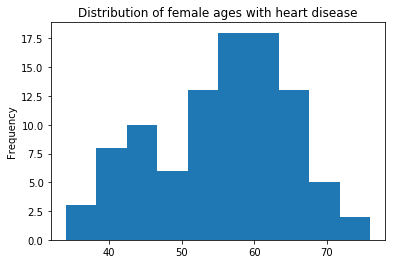

In [29]:
is_female = data['sex'] == 0
all_females = data[is_female]
all_females['age'].plot.hist(title = "Distribution of female ages with heart disease")
all_females['age'].describe()

From the female data, we can see that the average age is 55 years old, only a slight difference from the male average. What is interesting is that most cases for females occurs at 63 years old, a four year difference from males.  

Overall, the two most striking differences between the two genders were the frequency and the mode of age. Males had more than twice the cases than the females had while females tended to develop heart disease later than the average man. 

**Step 3: Investigating the root cause**

It was time to analyze the two biggest culprits for heart problems, blood pressure and cholesterol. 

In [30]:
data['trestbps'].describe()


count    303.000000
mean     131.623762
std       17.538143
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

In [31]:
data['chol'].describe()

count    303.000000
mean     246.264026
std       51.830751
min      126.000000
25%      211.000000
50%      240.000000
75%      274.500000
max      564.000000
Name: chol, dtype: float64

Any blood pressure level over 130 is considered stage 1 hypertension. Any cholesterol level over 200 is high. For both data sets, the average levels of both exceed these dangerous amounts implying that there is a correlation to heart disease and these problems. 

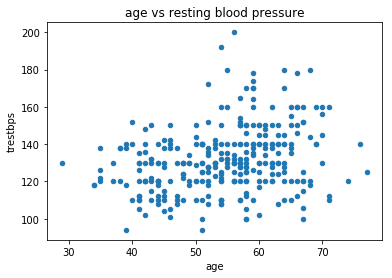

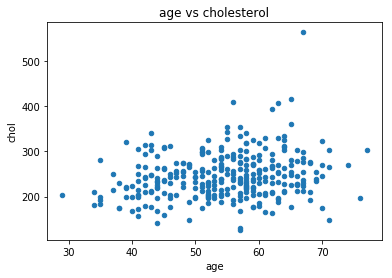

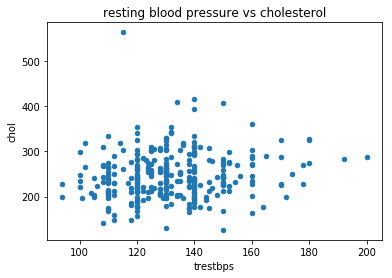

In [32]:
data.plot.scatter(x = 'age', y = 'trestbps', title = 'age vs resting blood pressure')
data.plot.scatter(x = 'age', y = 'chol', title = 'age vs cholesterol')
data.plot.scatter(x = 'trestbps', y = 'chol', title = 'resting blood pressure vs cholesterol')

There seems to be a postive correlation in the age vs blood pressure plot yet barely any correlation in the other two plots. Rather than leaving the correlations up to speculation I will conduct a linear regression for all the plots to quantify their relationships. 

**Age vs Resting Blood Pressure**

[0.47919278]


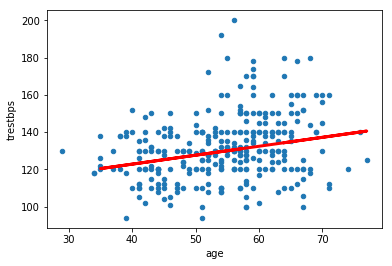

In [55]:
ages = pd.Series(data['age']).values
b_pressure = pd.Series(data['trestbps']).values
ages_train,ages_test = np.array_split(ages,2)
b_pressure_train,b_pressure_test = np.array_split(b_pressure,2)

ages_train = ages_train.reshape(-1,1)
ages_test = ages_test.reshape(-1,1)

#reg =  linear_model.LinearRegression()

reg.fit(ages_train,b_pressure_train)
b_pressure_predicted = reg.predict(ages_test)

data.plot.scatter(x='age',y= 'trestbps')
md.plot(ages_test,b_pressure_predicted,linewidth = 3, color = 'red')
print(reg.coef_)

**Age Vs Cholesterol**

152
152
[1.2886155]


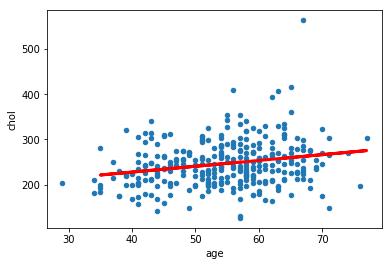

In [54]:
ages = pd.Series(data['age']).values
chol = pd.Series(data['chol']).values
ages_train,ages_test = np.array_split(ages,2)
chol_train,chol_test = np.array_split(chol,2)


ages_train = ages_train.reshape(-1,1)
ages_test = ages_test.reshape(-1,1)

reg.fit(ages_train,chol_train)
chol_predicted = reg.predict(ages_test)

data.plot.scatter(x = 'age', y = 'chol')
md.plot(ages_test,chol_predicted,linewidth = 3, color = 'red')
print(reg.coef_)



#Y = Y.reshape(len(Y),1)



**Resting Blood Pressure vs Cholesterol**

[0.326986]


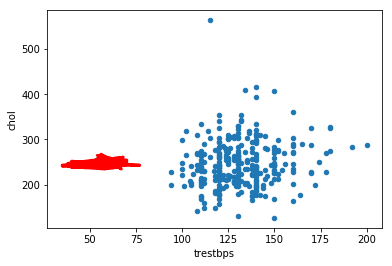

In [53]:
bps = pd.Series(data['trestbps']).values
chol = pd.Series(data['chol']).values
bps_train,bps_test = np.array_split(bps,2)
chol_train,chol_test = np.array_split(chol,2)

bps_train = bps_train.reshape(-1,1)
bps_test = bps_test.reshape(-1,1)

reg.fit(bps_train,chol_train)

chol_predicted = reg.predict(bps_test)


data.plot.scatter(x = 'trestbps', y = 'chol')
md.plot(ages_test,chol_predicted,linewidth = 3, color = 'red')
print(reg.coef_)

In the age vs cholesterol and age vs blood pressure plots, the linear regression model told us that there is a positive correlation in those two sets of relationships suggesting individuals are more succeptible to dangerously high levels or blood pressure and cholesterol as they age. The model for the blood pressure vs cholesterol plot suggests that cholesterol and blood pressure levels are independent of eachother.   

These models suggest that the risk for heart disease increases as a person ages but as seen in the data from step 1, this was not the case. So why do the models say otherwise? I decided to again to an age based approach by figuring out at what age do most blood pressure and cholesterol conditions start.

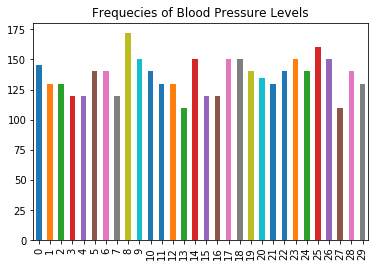

In [38]:
data['trestbps'].head(30).plot.bar(title = "Frequecies of Blood Pressure Levels")

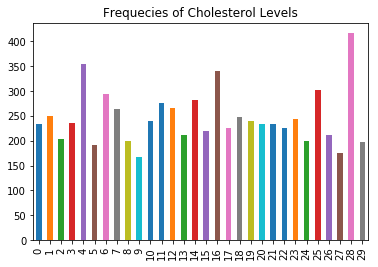

In [37]:
data['chol'].head(30).plot.bar(title = "Frequecies of Cholesterol Levels")

From the two graphs, a blood pressure level of 175 and a cholesterol level of 400 were the most commonly reported. We can use the previously constructed linear models to predict at which age is an individual succeptible to these levels . 

In [ ]:
ages = pd.Series(data['age']).values
chol = pd.Series(data['chol']).values
ages_train,ages_test = np.array_split(ages,2)
chol_train,chol_test = np.array_split(chol,2)

ages = pd.Series(data['age']).values
b_pressure = pd.Series(data['trestbps']).values
ages_train,ages_test = np.array_split(ages,2)
b_pressure_train,b_pressure_test = np.array_split(b_pressure,2)

